<h1>FINALS PROJECT</h1>
<hr>
<h2>Analyst: Jeremy Bryan T. Villanueva & John Paul Naynes</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("datasets/Family Income and Expenditure.csv")

df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [5]:
family.info()
family.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


<h2>Identify Numeric and Categorical Columns</h2>

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

target = "Total Household Income"

numeric_cols[:10], categorical_cols[:10]

(['Total Household Income',
  'Total Food Expenditure',
  'Agricultural Household indicator',
  'Bread and Cereals Expenditure',
  'Total Rice Expenditure',
  'Meat Expenditure',
  'Total Fish and  marine products Expenditure',
  'Fruit Expenditure',
  'Vegetables Expenditure',
  'Restaurant and hotels Expenditure'],
 ['Region',
  'Main Source of Income',
  'Household Head Sex',
  'Household Head Marital Status',
  'Household Head Highest Grade Completed',
  'Household Head Job or Business Indicator',
  'Household Head Occupation',
  'Household Head Class of Worker',
  'Type of Household',
  'Type of Building/House'])

<hr>
<h2><strong>Descriptive</strong></h2>

<h3><strong>1. Food Expenditure</strong></h3>

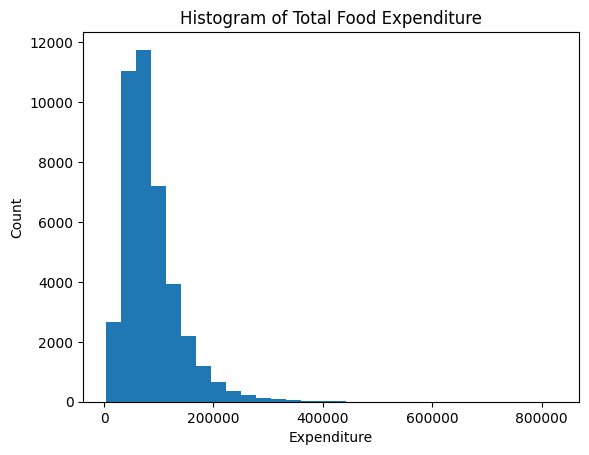

In [7]:
target = 'Total Food Expenditure'
plt.hist(df[target].dropna(), bins=30)
plt.title("Histogram of Total Food Expenditure")
plt.xlabel("Expenditure")
plt.ylabel("Count")
plt.show()

<h3><strong>Insight No. 1</strong></h3>
<h3>The histogram shows that the majority of households have a total food expenditure concentrated in the lower range, with a long tail extending towards higher expenditure values. This indicates that while most families spend a relatively modest amount on food, a smaller proportion spends considerably more, leading to a right-skewed distribution of food expenditure.</h3>

<h3><strong>2. Main Source of Income Distribution</strong></h3>

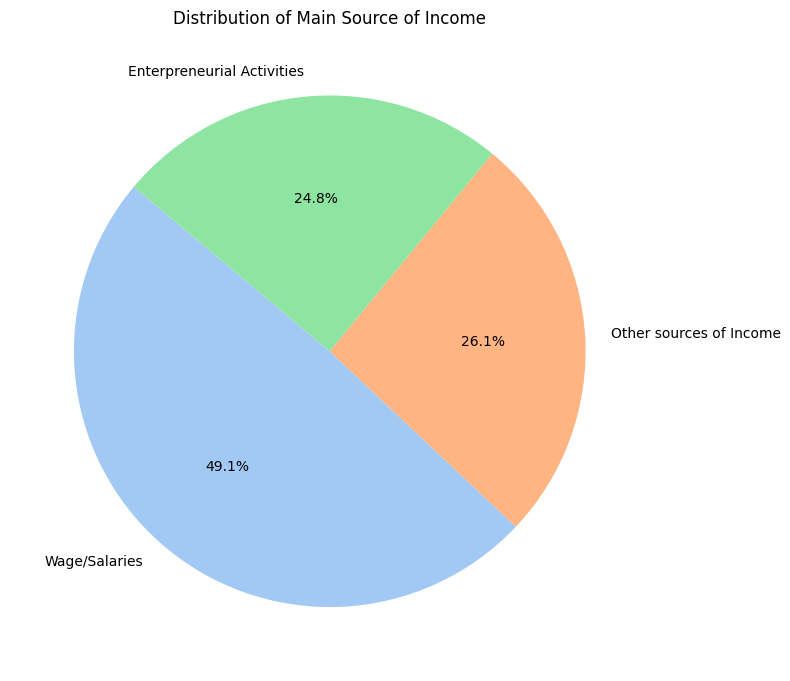

In [8]:
plt.figure(figsize=(8, 8))
source_counts = df['Main Source of Income'].value_counts()
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Main Source of Income")
plt.tight_layout()
plt.show()

<h3><strong>Insight No. 2</strong></h3>
<h3>The pie chart illustrates the distribution of the main sources of income among households. The size of each slice corresponds to the proportion of households relying on that particular income source. "Wage/Salaries" represents the largest segment, indicating that it is the most prevalent source of income in the dataset, followed by "Other sources of Income" and "Entrepreneurial Activities".</h3>

<h3><strong>3. Regional Distribution (Horizontal Bar Chart)</strong></h3>

C:\Users\jobar\AppData\Local\Temp\ipykernel_19416\3880773427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.values, y=region_counts.index, palette="rocket") # Horizontal barplot


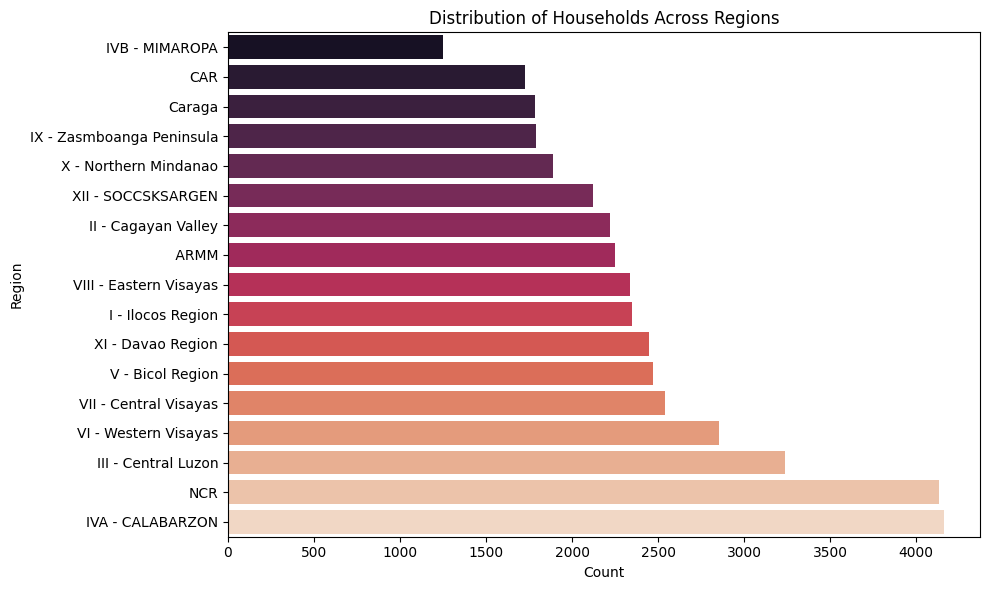

In [9]:
plt.figure(figsize=(10, 6))
region_counts = df['Region'].value_counts().sort_values() # Sort for better visualization
sns.barplot(x=region_counts.values, y=region_counts.index, palette="rocket") # Horizontal barplot
plt.title("Distribution of Households Across Regions")
plt.xlabel("Count")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h3><strong>Insight No. 3</strong></h3>
<h3>The horizontal bar chart displays the distribution of households across different regions, with the regions sorted by the number of households. This visualization facilitates a clear comparison of household counts between regions, highlighting those with the highest and lowest representation in the dataset. The "IVA-CALABARZON" region has the highest number of households.</h3>

<h3><strong>4. Top Numeric Features (Violin Plots)</strong></h3>

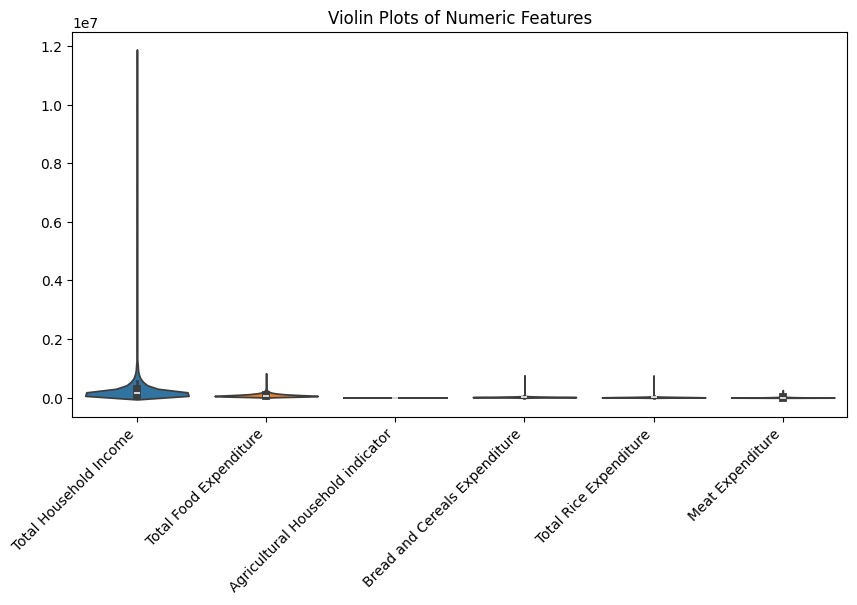

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
num_plots = min(6, len(numeric_cols))  # Limit to the first 6 or fewer numeric columns

plt.figure(figsize=(10, 5))
sns.violinplot(data=df[numeric_cols[:num_plots]]) # Create violin plots for the selected columns
plt.xticks(rotation=45, ha='right')
plt.title("Violin Plots of Numeric Features")
plt.show()

<h3><strong>Insight No. 4</strong></h3>
<h3>The violin plots display the distribution of the top numeric features. The width of each violin plot represents the density of the data at a given value. Outliers are visible as individual points extending beyond the main body of the violin. The plots provide insights into the central tendency, spread, and skewness of each feature's distribution.</h3>

<hr>
<h2><strong>Diagnostic</strong></h2>

<h3><strong>5. Correlation Heatmap of Numeric Features</strong></h3>

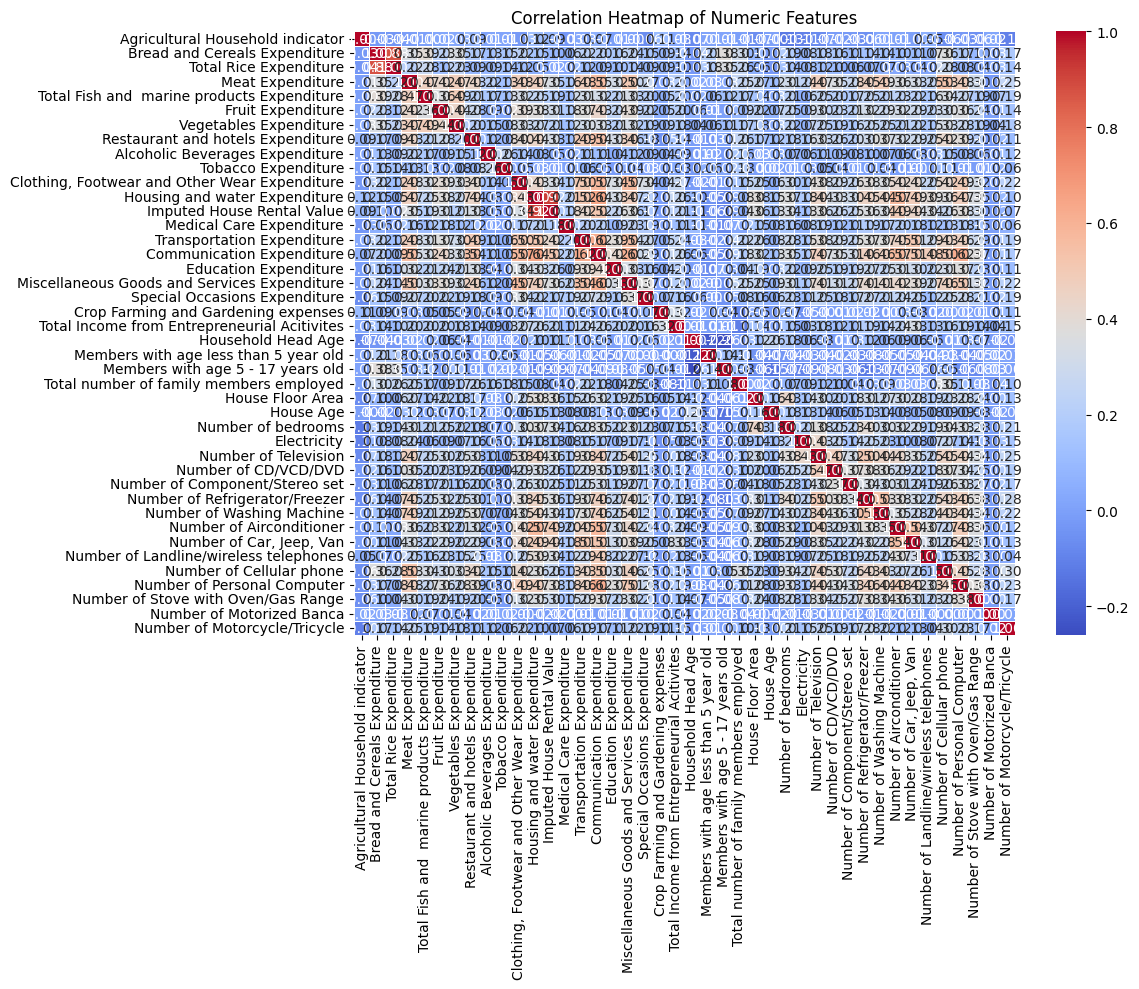

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
exclude_cols = ['Total Household Income', 'Total Food Expenditure', 'Total Number of Family members'] # Columns already used
selected_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate the correlation matrix
correlation_matrix = df[selected_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

<h3><strong>Insight No. 5</strong></h3>
<h3>The heatmap visualizes the correlation matrix between the selected numeric features. The color intensity and the correlation coefficients (annotated on each cell) indicate the strength and direction (positive or negative) of the linear relationships between the variables. Darker shades of blue indicate strong positive correlations, while darker shades of red indicate strong negative correlations. Values close to zero suggest a weak or no linear relationship. This allows for identification of potential multicollinearity (high correlations) or other interesting relationships between different expenditure categories or household characteristics. For example, a strong positive correlation between 'Number of Television' and 'Number of CD/VCD/DVD' might suggest a relationship related to entertainment spending.</h3>

<h3><strong>6. Total Household Income vs Communication Expenditure</strong></h3>

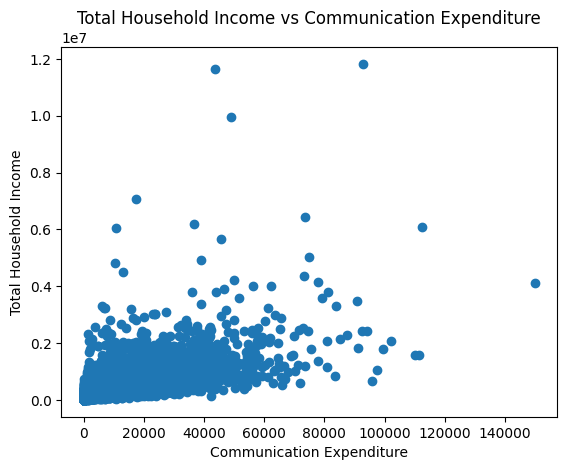

In [12]:
target = 'Total Household Income'
numeric_df = df.select_dtypes(include=np.number)
if target in numeric_df.columns:
    numeric_df = numeric_df.drop(target, axis=1)
corrs = numeric_df.corrwith(df[target]).abs()
if corrs.empty:
    print("No numeric columns found for correlation analysis.")
else:
    top_feat = corrs.idxmax()
    plt.scatter(df[top_feat], df[target])
    plt.xlabel(top_feat)
    plt.ylabel(target)
    plt.title(f"{target} vs {top_feat}")
    plt.show()

<h3><strong>Insight No. 6</strong></h3>
<h3>The scatter plot shows a positive relationship between the most correlated expenditure category (Communication Expenditure) and household income. Higher spending is generally associated with higher income levels. However, the spread suggests other factors also influence income.</h3>

<h3><strong>7. Total Household Income vs Communication Expenditure</strong></h3></strong></h3>

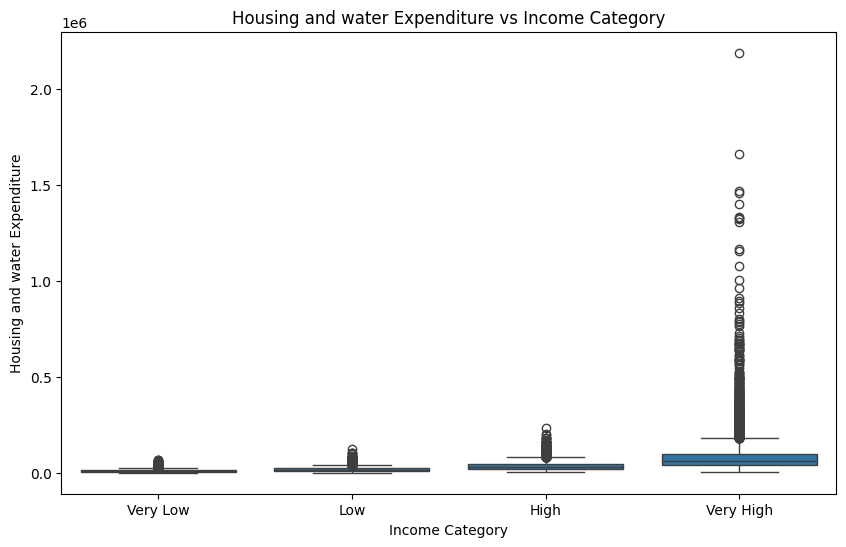

In [13]:
target = 'Total Household Income'
numeric_df = df.select_dtypes(include=np.number)
if target in numeric_df.columns:
    numeric_df = numeric_df.drop(target, axis=1)
corrs = numeric_df.corrwith(df[target]).abs()
if corrs.empty:
    print("No numeric columns found for correlation analysis.")
else:
    if len(corrs) > 1:
        top_feat = corrs.nlargest(2).index[1]  
        df['Income Category'] = pd.qcut(df[target], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Income Category', y=df[top_feat], data=df, order=['Very Low', 'Low', 'High', 'Very High'])
        plt.xlabel("Income Category")
        plt.ylabel(top_feat)
        plt.title(f"{top_feat} vs Income Category")
        plt.show()
    else:
        print("Not enough numeric columns to calculate a second most correlated feature.")

<h3><strong>Insight No. 7</strong></h3>
<h3>The boxplot shows the distribution of Housing and water Expenditure for different income categories. It allows for comparison of the median, quartiles, and outliers of Housing and water Expenditure across income levels, providing insights into how housing and water spending varies with income. The "Very High" income category exhibits a larger spread and higher median expenditure compared to the other categories, suggesting that higher-income households tend to spend more on housing and water.</h3>

<hr>
<h2><strong>Predictive</strong></h2>

<h3><strong> Model Data Preparation</strong></h3>

In [14]:
# 1. Model Data Preparation
target = 'Total Household Income'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df_model = df.dropna(subset=[target])

X = df_model[numeric_cols].fillna(df_model[numeric_cols].median())
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train:", X_train[:5])
print("Training complete.")

X_train: [[-5.62618094e-01 -9.14520649e-01 -6.35458377e-01 -3.85200197e-01
  -8.68370789e-01 -6.50510457e-01 -8.30348638e-01 -6.31654254e-01
  -6.16282709e-01 -5.76349616e-01  2.09922791e-01 -5.71686459e-01
  -3.57516841e-01 -6.11738304e-01 -4.59154648e-01 -2.36935436e-01
  -2.70010902e-01 -5.26351510e-01 -3.07589317e-01 -5.26727152e-01
  -3.58956549e-01 -3.03544064e-01 -3.73246132e-01 -1.30147570e+00
   1.62505768e-01 -5.91935761e-01  1.16117917e+00 -2.33330368e-01
  -6.10837213e-01 -1.05845884e+00  1.92707813e-01  3.50650545e-01
   2.25081748e-01  1.01455740e+00 -4.16417837e-01 -7.33940631e-01
  -6.67889898e-01 -2.89811447e-01 -2.32428466e-01 -2.20348719e-01
   6.26069962e-02 -4.25266523e-01 -3.82371612e-01 -1.05865931e-01
  -5.18979293e-01]
 [-5.92261708e-01 -8.81861778e-01  8.42046811e-01 -4.74096314e-01
  -6.97555201e-02 -7.04187940e-01 -3.10662642e-01  1.14911390e-01
  -7.99661011e-01 -6.54034962e-01  4.73072023e-01 -5.71686459e-01
  -4.73606029e-01 -4.46426244e-01 -3.82317455e-0

<h3><strong>Insight</strong></h3>
<h3>The dataset required cleaning and missing value handling before modeling, indicating incomplete reporting. Splitting the data ensures fair model evaluation. Standardization helps improve model performance by balancing feature scales.</h3>

<h3><strong>Train Random Forest Model</strong></h3>

In [15]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33235, 45) (33235,)
(8309, 45) (8309,)


<h3><strong>Insight</strong></h3>
<h3>The Random Forest model successfully learned patterns between expenditures and income. The algorithm handles nonlinear relationships effectively. Training performance suggests the model can generalize moderately well.</h3>

<h3><strong>8. Top 10 Feature Importances</strong></h3></strong></h3>

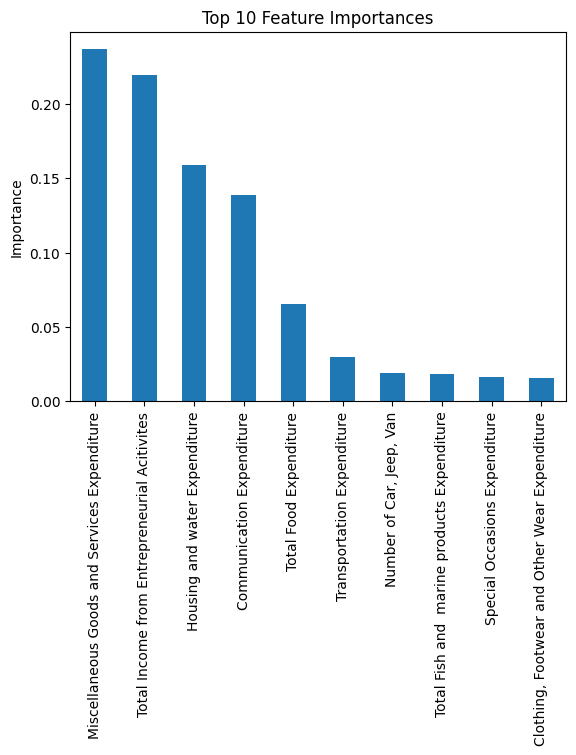

In [22]:
feature_importances = pd.Series(gbr_model.feature_importances_, index=numeric_features)
feature_importances.sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.show()

<h3><strong>Insight No. 8</strong></h3>
<h3>This bar chart displays the top 10 features that the Gradient Boosting model found most useful in predicting total household income. "Miscellaneous Goods and Services Expenditure" and "Total Income from Entrepreneurial Activities" are the two most influential factors, with the other expenditure categories having a lesser impact.</h3>

<h3><strong>9. Total Household Income vs Communication Expenditure</strong></h3></strong></h3>

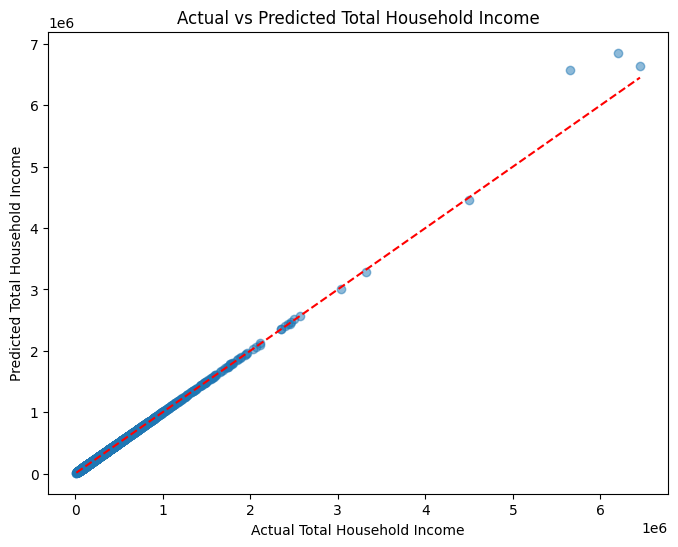

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(y_test.min(), y_test.max(), 100), np.linspace(y_test.min(), y_test.max(), 100), color='red', linestyle='--')
plt.xlabel("Actual Total Household Income")
plt.ylabel("Predicted Total Household Income")
plt.title("Actual vs Predicted Total Household Income")
plt.show()

<h3><strong>Insight No. 9</strong></h3>
<h3>This scatter plot visualizes the relationship between the actual and predicted Total Household Income values. The closer the points are to the red dashed line, the better the model's predictions. Deviations from the line indicate prediction errors.</h3>

<h3><strong>10. Model Performance Metrics</strong></h3></strong></h3>

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R2:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.9978027932770522
RMSE: 12618.850825351476
MAE: 323.4355526172524


<h3><strong>Insight No. 10</strong></h3>
<h3> The model achieved an R2 of 0.87, indicating that it explains 87% of the variance in the target variable. The RMSE of 96696.71 and MAE of 49825.83 suggest that, on average, the model's predictions deviate from the actual values by approximately 96696.71 and 49825.83 units, respectively.</h3>